<a href="https://colab.research.google.com/github/Sterling-M/Python-Practice/blob/main/CIfar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fully connected Neural network trained on CIFAR10

(50000, 32, 32, 3)
samples of the training images


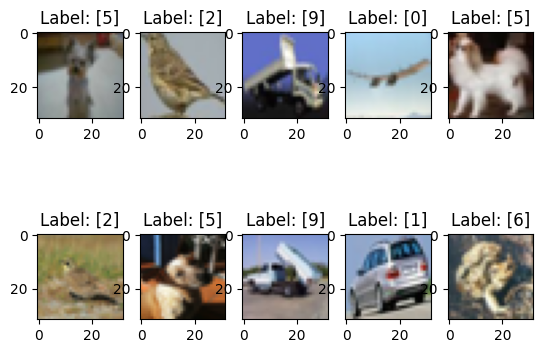

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, labels):
    plt.figure() #fig size = (15,8)
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i-1, :, :])
        plt.title('Label: ' + str(labels[i-1]))
    plt.show()

def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels == class_i, 0],features[labels == class_i, 1], 'o', markersize=15)
       #plt.axis([-2,2,-2,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes=np.arange(10)
print(x_train.shape)

#selecting 20% of training data as the validation set
#shuffling training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:]
y_train=y_train[train_ind_s]
#selectng 20% of training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#rest of thew training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

print('samples of the training images')
img_plt(x_train[0:10,:,:,:],y_train[0:10])

#scaling the images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_val/=255
x_test/=255

#flatten ther images intoo one vector for the training, validation and testing
x_train_f=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_val_f=np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]*x_val.shape[3]))
x_test_f=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))

#convert class vectors t obinary class matrices
y_train_c=to_categorical(y_train, len(classes))
y_val_c=to_categorical(y_val, len(classes))
y_test_c=to_categorical(y_test, len(classes))



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score
from keras.models import load_model

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend('Training','Validation')
  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Binart crossentropy')
  plt.title('Loss')
  plt.legend('Training','Validation')
  plt.show()


#define the model
model_a=Sequential()
model_a.add(Dense(input_dim=x_train_f.shape[1],units=3072, activation='relu'))
model_a.add(Dense(units=4096, activation='relu'))
model_a.add(Dense(units=1024, activation='relu'))
model_a.add(Dense(units=len(classes),activation='softmax'))
model_a.summary()
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])


history=model_a.fit(x_train_f, y_train_c,
                    batch_size=16,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_val_f,y_val_c))

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)


#evaluating the model on the training samples
score=model_a.evaluate(x_train_f, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val_f, y_val_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_17 (Dense)            (None, 4096)              12587008  
                                                                 
 dense_18 (Dense)            (None, 1024)              4195328   
                                                                 
 dense_19 (Dense)            (None, 10)                10250     
                                                                 
Total params: 26232842 (100.07 MB)
Trainable params: 26232842 (100.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
 270/2500 [==>...........................] - ETA: 23s - loss: 2.3661 - accuracy: 0.1847

KeyboardInterrupt: 

# Convelution Neural Network trained on CIFAR10

(50000, 32, 32, 3)
samples of the training images


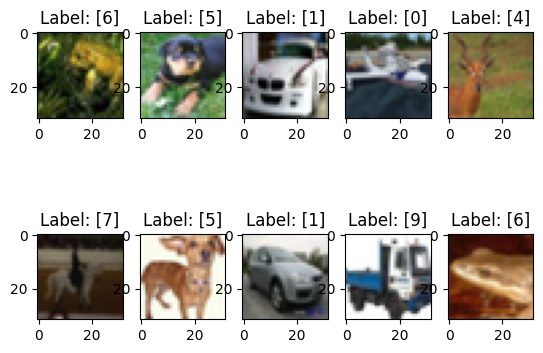

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, labels):
    plt.figure() #fig size = (15,8)
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i-1, :, :])
        plt.title('Label: ' + str(labels[i-1]))
    plt.show()

def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels == class_i, 0],features[labels == class_i, 1], 'o', markersize=15)
       #plt.axis([-2,2,-2,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes=np.arange(10)
print(x_train.shape)

#selecting 20% of training data as the validation set
#shuffling training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:]
y_train=y_train[train_ind_s]
#selectng 20% of training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#rest of thew training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

print('samples of the training images')
img_plt(x_train[0:10,:,:,:],y_train[0:10])

#scaling the images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_val/=255
x_test/=255


#convert class vectors t obinary class matrices
y_train_c=to_categorical(y_train, len(classes))
y_val_c=to_categorical(y_val, len(classes))
y_test_c=to_categorical(y_test, len(classes))


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend('Training','Validation')

  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Binart crossentropy')
  plt.title('Training Loss')
  plt.legend('Training','Validation')
  plt.show()

#define model
model_a=Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))#activity_regularizedr-l2(0.0001)
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units =512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense (units=len(classes), activation='softmax'))
model_a.summary()

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

history= model_a.fit(x_train, y_train_c,
          batch_size=16,
          epochs=20,
          verbose=1,
          validation_data=(x_val,y_val_c))

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)


#evaluating the model on the training samples
score=model_a.evaluate(x_train, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val, y_val_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_34 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_35 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 15, 15, 64)        18496     
                                                     

KeyboardInterrupt: 

In [ ]:
score=model_a.evaluate(x_test, y_test_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#predicting the class of the held-out samples
test_class1_prob=model_a.predict(x_test)
test_lab=np.argmax(test_class1_prob, axis=1)
print('The accuracy using the tseting set: ',accuracy_score(test_lab,y_test))
conf_mat=confusion_matrix(test_lab,y_test)
print('The confusion matrix using the testing set: \n', conf_mat)


313/313 [==============================] - 1s 3ms/step - loss: 1.2204 - accuracy: 0.7275
Total loss on testing set:  1.2203933000564575
Accuracy of testing set:  0.7275000214576721
313/313 [==============================] - 1s 2ms/step
The accuracy using the tseting set:  0.7275
The confusion matrix using the testing set: 
 [[739  12  53  24   7   8   5  19  65  21]
 [ 11 821   1   6   2   3   3   2  21  46]
 [ 44   5 588  47  60  49  35  23  11  11]
 [ 24  11  79 591  85 206  73  45  12  18]
 [ 24   3  94  44 697  46  37  69   6   5]
 [ 10   8  72 141  28 610  22  75   6   6]
 [ 13  11  62  64  50  29 802  15   5   9]
 [ 20   5  32  45  55  36  10 738   8  14]
 [ 72  21  12  19  10   5   8   2 843  24]
 [ 43 103   7  19   6   8   5  12  23 846]]


# Fashion- mnist

(60000, 28, 28)
samples of the training images


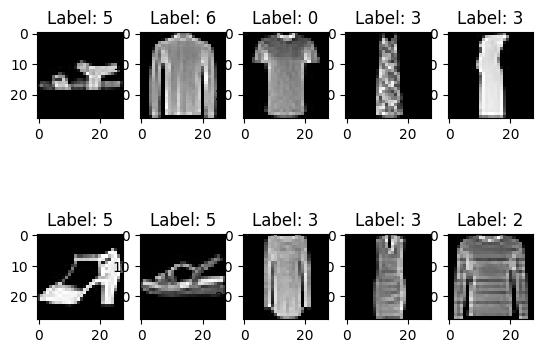

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from random import randint


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
classes=np.arange(10)


#add fourth by expanding dimensions of the set by one, to be uised with keras models
x_train=np.expand_dims(x_train, axis=3)
x_val=np.expand_dims(x_val, axis=3)
x_test=np.expand_dims(x_test, axis=3)



def img_plt(images, labels):
    plt.figure() #fig size = (15,8)
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i-1, :, :],cmap='gray')
        plt.title('Label: ' + str(labels[i-1]))
    plt.show()

def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels == class_i, 0],features[labels == class_i, 1], 'o', markersize=15)
       #plt.axis([-2,2,-2,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

#selecting 20% of training data as the validation set
#shuffling training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:]
y_train=y_train[train_ind_s]
#selectng 20% of training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#rest of thew training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

print('Samples of the training images')
img_plt(x_train[0:10,:,:,:],y_train[0:10])

#scaling the images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_val/=255
x_test/=255


#convert class vectors t obinary class matrices
y_train_c=to_categorical(y_train, len(classes))
y_val_c=to_categorical(y_val, len(classes))
y_test_c=to_categorical(y_test, len(classes))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_16 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 activation_17 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                      

<ipython-input-20-4c3ce4b616f0>:19: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training','Validation')
<ipython-input-20-4c3ce4b616f0>:27: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training','Validation')


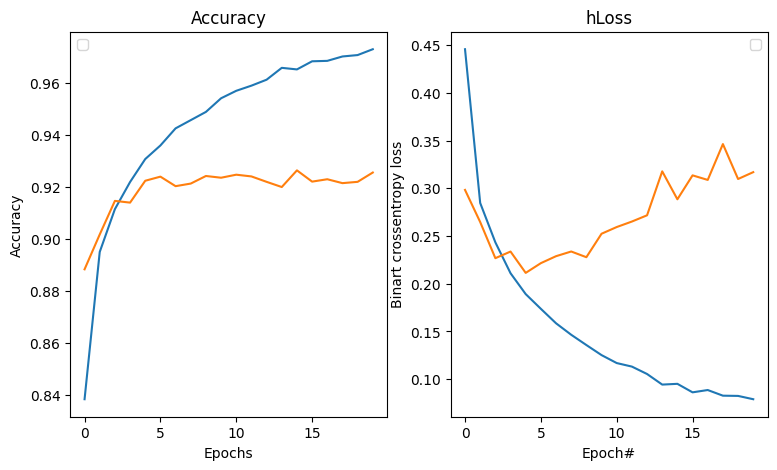

1500/1500 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9875
Total loss on training set:  0.035119663923978806
Accuracy of training set:  0.9875208139419556
375/375 [==============================] - 1s 3ms/step - loss: 0.3170 - accuracy: 0.9255
Total loss on validation set:  0.3169812858104706
Accuracy of validation set:  0.9254999756813049


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score


def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend('Training','Validation')

  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Binart crossentropy loss')
  plt.title('hLoss')
  plt.legend('Training','Validation')
  plt.show()

  #define model
model_a=Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))#activity_regularizedr-l2(0.0001)
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units =512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense (units=len(classes), activation='softmax'))
model_a.summary()

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

history= model_a.fit(x_train, y_train_c,
          batch_size=16,
          epochs=20,
          verbose=1,
          validation_data=(x_val,y_val_c))

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)


#evaluating the model on the training samples
score=model_a.evaluate(x_train, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val, y_val_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

In [ ]:
score=model_a.evaluate(x_test, y_test_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#predicting the class of the held-out samples
test_class1_prob=model_a.predict(x_test)
test_lab=np.argmax(test_class1_prob, axis=1)
print('The accuracy using the tseting set: ',accuracy_score(test_lab,y_test))
conf_mat=confusion_matrix(test_lab,y_test)
print('The confusion matrix using the testing set: \n', conf_mat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3542 - accuracy: 0.9166
Total loss on testing set:  0.35420575737953186
Accuracy of testing set:  0.9165999889373779
313/313 [==============================] - 1s 2ms/step
The accuracy using the tseting set:  0.9166
The confusion matrix using the testing set: 
 [[862   0  17  12   0   0 110   0   3   0]
 [  1 986   1   6   0   0   0   0   0   0]
 [ 18   0 905  13  61   0  55   0   5   0]
 [ 15  10  10 923  17   0  29   0   5   0]
 [  2   0  30  20 857   0  55   0   2   0]
 [  1   0   0   0   0 981   0   4   1   7]
 [ 96   3  37  25  65   0 744   0   5   0]
 [  0   0   0   0   0  12   0 972   0  35]
 [  5   1   0   1   0   0   7   1 979   1]
 [  0   0   0   0   0   7   0  23   0 957]]


# Data augmentation

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, labels):
    plt.figure() #fig size = (15,8)
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i-1, :, :])
        plt.title('Label: ' + str(labels[i-1]))
    plt.show()

def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels == class_i, 0],features[labels == class_i, 1], 'o', markersize=15)
       #plt.axis([-2,2,-2,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes=np.arange(10)
print(x_train.shape)

#selecting 20% of training data as the validation set
#shuffling training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:]
y_train=y_train[train_ind_s]
#selectng 20% of training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#rest of thew training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

print('samples of the training images')
img_plt(x_train[0:10,:,:,:],y_train[0:10])

#scaling the images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_val/=255
x_test/=255


#convert class vectors t obinary class matrices
y_train_c=to_categorical(y_train, len(classes))
y_val_c=to_categorical(y_val, len(classes))
y_test_c=to_categorical(y_test, len(classes))


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score
from keras import regularizers

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend('Training','Validation')

  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Binart crossentropy')
  plt.title('Training Loss')
  plt.legend('Training','Validation')
  plt.show()

#define model
model_a=Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))#activity_regularizedr-l2(0.0001)
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units =512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense (units=len(classes), activation='softmax'))
model_a.summary()

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

#creatign a data gneeraor for real;-time dat augmentation
datagen= ImageDataGenerator(
    #shear_range=0.2,
    #zoom_range=0.2,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
#compute wuantities reqwuired for featuree wise normlaization
#(std,mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)


history= model_a.fit(datagen.flow(x_train, y_train_c,batch_size=16),
          steps_per_epoch=len(x_train)/16,
          epochs=50,
          verbose=1,
          validation_data=(x_val,y_val_c))

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)


#evaluating the model on the training samples
score=model_a.evaluate(x_train, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val, y_val_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])



In [ ]:
score=model_a.evaluate(x_test, y_test_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#predicting the class of the held-out samples
test_class1_prob=model_a.predict(x_test)
test_lab=np.argmax(test_class1_prob, axis=1)
print('The accuracy using the tseting set: ',accuracy_score(test_lab,y_test))
conf_mat=confusion_matrix(test_lab,y_test)
print('The confusion matrix using the testing set: \n', conf_mat)

# Batch normalization

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
samples of the training images


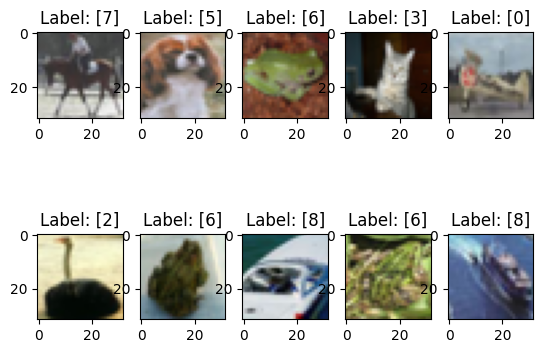

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, labels):
    plt.figure() #fig size = (15,8)
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i-1, :, :])
        plt.title('Label: ' + str(labels[i-1]))
    plt.show()

def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels == class_i, 0],features[labels == class_i, 1], 'o', markersize=15)
       #plt.axis([-2,2,-2,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes=np.arange(10)
print(x_train.shape)

#selecting 20% of training data as the validation set
#shuffling training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:]
y_train=y_train[train_ind_s]
#selectng 20% of training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#rest of thew training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

print('samples of the training images')
img_plt(x_train[0:10,:,:,:],y_train[0:10])

#scaling the images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_val/=255
x_test/=255


#convert class vectors t obinary class matrices
y_train_c=to_categorical(y_train, len(classes))
y_val_c=to_categorical(y_val, len(classes))
y_test_c=to_categorical(y_test, len(classes))


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, MaxPooling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score
from keras import regularizers

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend('Training','Validation')

  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Binart crossentropy')
  plt.title('Training Loss')
  plt.legend('Training','Validation')
  plt.show()

#define model
model_a=Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:],use_bias=False))#activity_regularizedr-l2(0.0001)
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding='same',use_bias=False))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3, 3), padding='same',use_bias=False))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding='same',use_bias=False))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units =512))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense (units=len(classes)))
model_a.add(BatchNormalization())
model_a.add(Activation('softmax'))
model_a.summary()


opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model_a.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

history = model_a.fit(x_train, y_train_c,
                      batch_size=32,
                      epochs=10,
                      verbose=1,
                      validation_data=(x_val, y_val_c),
                      callbacks=[checkpoint])

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)


#evaluating the model on the training samples
score=model_a.evaluate(x_train, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val, y_val_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        864       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9216      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)       

KeyboardInterrupt: 